In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

,Length,Elevation
0,0.000000,688.370361
1,44.487419,703.608765
2,88.974837,719.776489
3,133.462256,696.747498
4,177.949674,684.812805


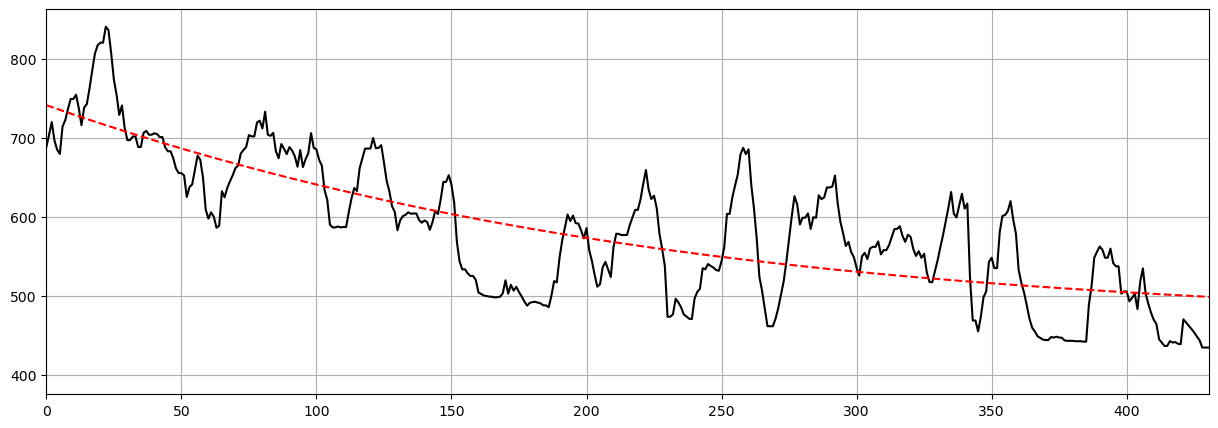

In [3]:
df = pd.read_csv('..//Data//River_elevation.txt', sep='\\s+', names=['Length', 'Elevation'])

display(df.head())

trend = np.polyfit(df.index, df['Elevation'], 3)
trend_line = np.poly1d(trend)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['Elevation'], 'k-')
ax.plot(df.index, trend_line(df.index), 'r--', label='Trend Line')
ax.set_xlim(0, df['Elevation'].values[-1])
ax.grid()

40600.761677237795
135.0
37428.38988685288
116.0


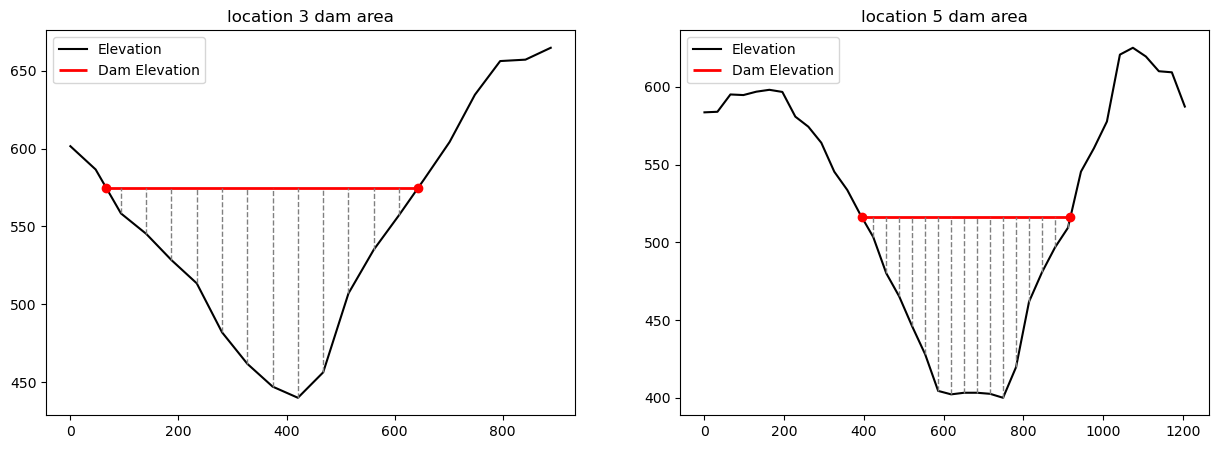

In [36]:
x = [
    0.0,
    46.7881175520245,
    93.576235104049,
    140.3643526560735,
    187.152470208098,
    233.94058776012253,
    280.728705312147,
    327.5168228641715,
    374.304940416196,
    421.09305796822053,
    467.88117552024505,
    514.6692930722695,
    561.457410624294,
    608.2455281763185,
    655.033645728343,
    701.8217632803676,
    748.609880832392,
    795.3979983844165,
    842.1861159364411,
    888.9742334884655
]

h = [
    601.5514526367188,
    586.5985107421875,
    558.3992919921875,
    545.2608032226562,
    528.390625,
    513.4702758789062,
    482.0101318359375,
    461.80377197265625,
    447.1673889160156,
    440.0,
    456.3442687988281,
    507.0431823730469,
    535.0842895507812,
    557.2680053710938,
    580.4890747070312,
    604.25732421875,
    634.5720825195312,
    656.2134399414062,
    657.117919921875,
    664.7411499023438
]

x5 = [
    0.0, 32.560432352369936, 65.12086470473987, 97.68129705710982,
    130.24172940947975, 162.80216176184967, 195.36259411421963,
    227.92302646658956, 260.4834588189595, 293.04389117132945,
    325.60432352369935, 358.1647558760693, 390.72518822843927,
    423.28562058080917, 455.8460529331791, 488.406485285549,
    520.966917637919, 553.5273499902889, 586.0877823426589,
    618.6482146950287, 651.2086470473987, 683.7690793997687,
    716.3295117521386, 748.8899441045086, 781.4503764568785,
    814.0108088092484, 846.5712411616183, 879.1316735139883,
    911.6921058663582, 944.2525382187282, 976.812970571098,
    1009.373402923468, 1041.933835275838, 1074.4942676282078,
    1107.0546999805779, 1139.6151323329477, 1172.1755646853178,
    1204.7359970376876
]

h5 = [
    583.5844116210938, 583.947998046875, 595.0870361328125,
    594.6986694335938, 596.8809204101562, 598.0814208984375,
    596.7145385742188, 580.8177490234375, 574.3619995117188,
    564.0218505859375, 545.4056396484375, 533.6680908203125,
    517.9063720703125, 503.4056396484375, 480.16033935546875,
    465.17486572265625, 445.9334411621094, 427.9489440917969,
    404.4214782714844, 402.19952392578125, 403.22711181640625,
    403.2309265136719, 402.5469055175781, 400.0,
    419.7102966308594, 461.77044677734375, 480.72509765625,
    496.6760559082031, 509.3636169433594, 545.4540405273438,
    560.51611328125, 577.6937255859375, 620.7100219726562,
    625.1119995117188, 619.502685546875, 610.024169921875,
    609.3353881835938, 587.3051147460938
]

dam_level = 575
dam_level5 = 516

# Snijpunten zoeken
crossings = []
for i in range(1, len(h)):
    if (h[i-1] - dam_level) * (h[i] - dam_level) <= 0:  # tekenwisseling of exact raak
        x1, x2 = x[i-1], x[i]
        y1, y2 = h[i-1], h[i]
        # lineaire interpolatie
        x_cross = x1 + (dam_level - y1) * (x2 - x1) / (y2 - y1)
        crossings.append(x_cross)

crossings5 = []
for i in range(1, len(h5)):
    if (h5[i-1] - dam_level5) * (h5[i] - dam_level5) <= 0:  # tekenwisseling of exact raak
        x1, x2 = x5[i-1], x5[i]
        y1, y2 = h5[i-1], h5[i]
        # lineaire interpolatie
        x_cross = x1 + (dam_level5 - y1) * (x2 - x1) / (y2 - y1)
        crossings5.append(x_cross)

# plotten
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x, h, label="Elevation", color='black')
ax[0].set_title('location 3 dam area')

if len(crossings) >= 2:
    ax[0].hlines(dam_level, xmin=crossings[0], xmax=crossings[1], colors="red", linewidth=2, label="Dam Elevation")
    ax[0].scatter(crossings, [dam_level]*len(crossings), color="red", zorder=5)  # markeer snijpunten

area = 0
for i in range(len(h)):
    if h[i] < dam_level:
        area = area + ((dam_level - h[i]) * (x[i] - x[i-1]))
        ax[0].vlines(x[i], h[i], dam_level, color='gray', linestyle='--', linewidth=1)
print(area)
print(dam_level - np.min(h))
ax[0].legend()

ax[1].plot(x5, h5, label="Elevation", color='black')
ax[1].set_title('location 5 dam area')

if len(crossings5) >= 2:
    ax[1].hlines(dam_level5, xmin=crossings5[0], xmax=crossings5[1], colors="red", linewidth=2, label="Dam Elevation")
    ax[1].scatter(crossings5, [dam_level5]*len(crossings5), color="red", zorder=5)  # markeer snijpunten

area5 = 0
for i in range(len(h5)):
    if h5[i] < dam_level5:
        area5 = area5 + ((dam_level5 - h5[i]) * (x5[i] - x5[i-1]))
        ax[1].vlines(x5[i], h5[i], dam_level5, color='gray', linestyle='--', linewidth=1)
print(area5)
print(dam_level5 - np.min(h5))
ax[1].legend()



plt.savefig("..//figures//canyon profile.png")



In [ ]:
x = np.array([
    0.0,
    46.7881175520245,
    93.576235104049,
    140.3643526560735,
    187.152470208098,
    233.94058776012253,
    280.728705312147,
    327.5168228641715,
    374.304940416196,
    421.09305796822053,
    467.88117552024505,
    514.6692930722695,
    561.457410624294,
    608.2455281763185,
    655.033645728343,
    701.8217632803676,
    748.609880832392,
    795.3979983844165,
    842.1861159364411,
    888.9742334884655
])

y = np.array([
    601.5514526367188,
    586.5985107421875,
    558.3992919921875,
    545.2608032226562,
    528.390625,
    513.4702758789062,
    482.0101318359375,
    461.80377197265625,
    447.1673889160156,
    440.0,
    456.3442687988281,
    507.0431823730469,
    535.0842895507812,
    557.2680053710938,
    580.4890747070312,
    604.25732421875,
    634.5720825195312,
    656.2134399414062,
    657.117919921875,
    664.7411499023438
])

print('Location 3!')

# Doelwaarde
target_y = 575
crossings = []

# Zoek segmenten waar y=502 ligt tussen twee punten
for i in range(len(y) - 1):
    if (y[i] - target_y) * (y[i+1] - target_y) <= 0:  # overschrijding
        # lineaire interpolatie
        t = (target_y - y[i]) / (y[i+1] - y[i])
        x_cross = x[i] + t * (x[i+1] - x[i])
        crossings.append(x_cross)

# Resultaat tonen
if len(crossings) == 2:
    afstand = abs(crossings[1] - crossings[0])
    print(f"x-coördinaten bij y=596: {crossings}")
    print(f"Afstand tussen deze punten: {afstand}")
else:
    print(f"Gevonden doorsnedes: {crossings}")


Location 3!
x-coördinaten bij y=596: [np.float64(66.03235580007482), np.float64(643.9737126594142)]
Afstand tussen deze punten: 577.9413568593394


37428.38988685288
116.0


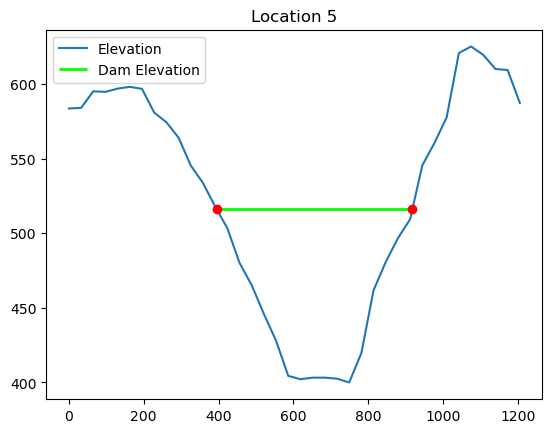

In [6]:
x = [
    0.0, 32.560432352369936, 65.12086470473987, 97.68129705710982,
    130.24172940947975, 162.80216176184967, 195.36259411421963,
    227.92302646658956, 260.4834588189595, 293.04389117132945,
    325.60432352369935, 358.1647558760693, 390.72518822843927,
    423.28562058080917, 455.8460529331791, 488.406485285549,
    520.966917637919, 553.5273499902889, 586.0877823426589,
    618.6482146950287, 651.2086470473987, 683.7690793997687,
    716.3295117521386, 748.8899441045086, 781.4503764568785,
    814.0108088092484, 846.5712411616183, 879.1316735139883,
    911.6921058663582, 944.2525382187282, 976.812970571098,
    1009.373402923468, 1041.933835275838, 1074.4942676282078,
    1107.0546999805779, 1139.6151323329477, 1172.1755646853178,
    1204.7359970376876
]

h = [
    583.5844116210938, 583.947998046875, 595.0870361328125,
    594.6986694335938, 596.8809204101562, 598.0814208984375,
    596.7145385742188, 580.8177490234375, 574.3619995117188,
    564.0218505859375, 545.4056396484375, 533.6680908203125,
    517.9063720703125, 503.4056396484375, 480.16033935546875,
    465.17486572265625, 445.9334411621094, 427.9489440917969,
    404.4214782714844, 402.19952392578125, 403.22711181640625,
    403.2309265136719, 402.5469055175781, 400.0,
    419.7102966308594, 461.77044677734375, 480.72509765625,
    496.6760559082031, 509.3636169433594, 545.4540405273438,
    560.51611328125, 577.6937255859375, 620.7100219726562,
    625.1119995117188, 619.502685546875, 610.024169921875,
    609.3353881835938, 587.3051147460938
]



dam_level = 516

# Snijpunten zoeken
crossings = []
for i in range(1, len(h)):
    if (h[i-1] - dam_level) * (h[i] - dam_level) <= 0:  # tekenwisseling of exact raak
        x1, x2 = x[i-1], x[i]
        y1, y2 = h[i-1], h[i]
        # lineaire interpolatie
        x_cross = x1 + (dam_level - y1) * (x2 - x1) / (y2 - y1)
        crossings.append(x_cross)

# plotten
plt.plot(x, h, label="Elevation")
plt.title('Location 5')

if len(crossings) >= 2:
    plt.hlines(dam_level, xmin=crossings[0], xmax=crossings[1], colors="lime", linewidth=2, label="Dam Elevation")
    plt.scatter(crossings, [dam_level]*len(crossings), color="red", zorder=5)  # markeer snijpunten


area = 0
for i in range(len(h)):
    if h[i] < dam_level:
        area = area + ((dam_level - h[i]) * (x[i] - x[i-1]))
print(area)
print(dam_level - np.min(h))
plt.legend();

In [7]:
x = np.array([
    0.0, 32.560432352369936, 65.12086470473987, 97.68129705710982,
    130.24172940947975, 162.80216176184967, 195.36259411421963,
    227.92302646658956, 260.4834588189595, 293.04389117132945,
    325.60432352369935, 358.1647558760693, 390.72518822843927,
    423.28562058080917, 455.8460529331791, 488.406485285549,
    520.966917637919, 553.5273499902889, 586.0877823426589,
    618.6482146950287, 651.2086470473987, 683.7690793997687,
    716.3295117521386, 748.8899441045086, 781.4503764568785,
    814.0108088092484, 846.5712411616183, 879.1316735139883,
    911.6921058663582, 944.2525382187282, 976.812970571098,
    1009.373402923468, 1041.933835275838, 1074.4942676282078,
    1107.0546999805779, 1139.6151323329477, 1172.1755646853178,
    1204.7359970376876
])

y = np.array([
    583.5844116210938, 583.947998046875, 595.0870361328125,
    594.6986694335938, 596.8809204101562, 598.0814208984375,
    596.7145385742188, 580.8177490234375, 574.3619995117188,
    564.0218505859375, 545.4056396484375, 533.6680908203125,
    517.9063720703125, 503.4056396484375, 480.16033935546875,
    465.17486572265625, 445.9334411621094, 427.9489440917969,
    404.4214782714844, 402.19952392578125, 403.22711181640625,
    403.2309265136719, 402.5469055175781, 400.0,
    419.7102966308594, 461.77044677734375, 480.72509765625,
    496.6760559082031, 509.3636169433594, 545.4540405273438,
    560.51611328125, 577.6937255859375, 620.7100219726562,
    625.1119995117188, 619.502685546875, 610.024169921875,
    609.3353881835938, 587.3051147460938
])
print('Location 5!')

# Doelwaarde
target_y = 516
crossings = []

# Zoek segmenten waar y=502 ligt tussen twee punten
for i in range(len(y) - 1):
    if (y[i] - target_y) * (y[i+1] - target_y) <= 0:  # overschrijding
        # lineaire interpolatie
        t = (target_y - y[i]) / (y[i+1] - y[i])
        x_cross = x[i] + t * (x[i+1] - x[i])
        crossings.append(x_cross)

# Resultaat tonen
if len(crossings) == 2:
    afstand = abs(crossings[1] - crossings[0])
    print(f"x-coördinaten bij y=596: {crossings}")
    print(f"Afstand tussen deze punten: {afstand}")
else:
    print(f"Gevonden doorsnedes: {crossings}")

Location 5!
x-coördinaten bij y=596: [np.float64(395.00582020122283), np.float64(917.6793867049254)]
Afstand tussen deze punten: 522.6735665037025
